# STEP 1: LOAD THE LIBRARIES

In [12]:
import pandas as pd
from sklearn import preprocessing
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import collections
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
import operator

# STEP 2: LOAD THE DATASET

In [2]:
data = pd.read_csv('Z-Alizadeh sani dataset .csv')

# STEP 3: PREPROCESS THE DATA

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
dataType_String = data.select_dtypes(include = "object").columns
for word in dataType_String:
    data[word] = le.fit_transform(data[word])

In [5]:
x = data.iloc[:,:56]
y = data['Cath']

CAD - 0 , Normal - 1

In [6]:
x = x.to_numpy()
y = y.to_numpy()

# STEP 4: FEATURE SELECTION USING BORUTA ALGORITHM

In [7]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(x, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [8]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest)

In [9]:
# find all relevant features
featureList = feat_selector.fit(x, y)

In [10]:
# check selected features
featurePresence = feat_selector.support_

In [11]:
# check ranking of features
featureRanking = feat_selector.ranking_

In [13]:
featureDicSortedList = sorted(featureDic.items(), key=operator.itemgetter(1))
featureDicSorted = dict(featureDicSortedList)

In [14]:
featureNamesList = list(featureDicSorted.keys())
featureRankingList = list(featureDicSorted.values())

In [21]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(x)

In [22]:
dic = {}
columnList = data.columns
indx = 0
columnListNew = []
for col in columnListNew:
    if(featurePresence[indx]==True):
        dic[col] = data[col]
    indx+=1

In [23]:
new_dict = {}
columnListNew = ['Typical Chest Pain', 'Atypical', 'Age', 'Region RWMA', 'EF-TTE']
for col in columnListNew:
    new_dict[col]=data[col]
new_df = pd.DataFrame(new_dict)

In [16]:
df1 = pd.DataFrame.from_dict(consider,orient='index',columns=['Importance'])
df1['Features'] = list(consider.keys())
df1

,Importance,Features
Typical Chest Pain,25,Typical Chest Pain
Atypical,15,Atypical
Age,13,Age
Region RWMA,13,Region RWMA
EF-TTE,11,EF-TTE
Nonanginal,10,Nonanginal
HTN,8,HTN
Tinversion,6,Tinversion
BP,5,BP
TG,5,TG


<AxesSubplot:xlabel='Features', ylabel='Importance'>

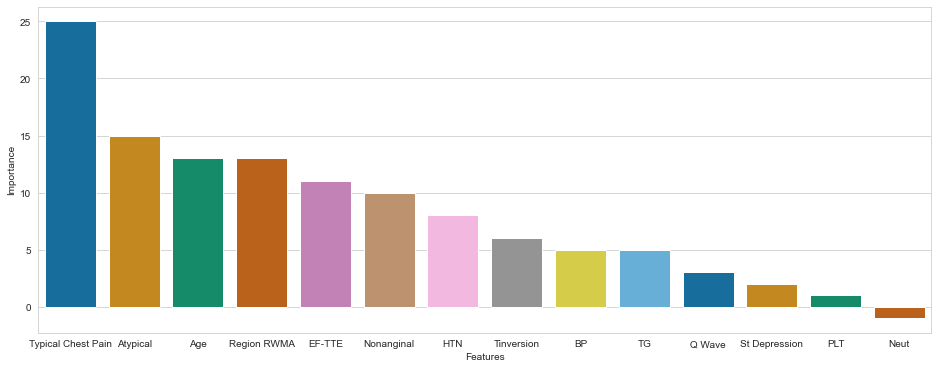

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.barplot(y='Importance', x = 'Features',data=df1, palette="colorblind")

# STEP 5: DATA PARTITIONING

In [25]:
x_new = new_df.to_numpy()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.1, random_state=5)

# STEP 6: TRAINING & TESTING THE MODEL

In [29]:
randomForest = RandomForestClassifier(max_depth=2, random_state=0)
knn = KNeighborsClassifier()
svm = SVC()
# evaluate model

In [30]:
randomForest.fit(X_train,y_train)
y_predRF = randomForest.predict(X_test)
knn.fit(X_train,y_train)
y_predKNN = knn.predict(X_test)
svm.fit(X_train,y_train)
y_predSVM = svm.predict(X_test)

# Stacking Ensemble Model

In [36]:
#Stores Final Results for each instance
AvgVotingResults = []
MajorityVotingResults = []
WeightedAverageResults = []

In [37]:
for i in range(0,testSamples):
    tempAVGVotingProb = ((resRF[y_predRF[i]] + resKNN[y_predKNN[i]] + resSVM[y_predSVM[i]])*1.0)/3
    if tempAVGVotingProb>0.5:
        AvgVotingResults.append(0)
    else:
        AvgVotingResults.append(1)       

In [38]:
for i in range(0,testSamples):
    tempMajorityVotingProb = statistics.mode([y_predRF[i],y_predKNN[i],y_predSVM[i]])
    MajorityVotingResults.append(tempMajorityVotingProb)    

In [40]:
for i in range(0,testSamples):
    tempWeightedAVGProb = w1*(resRF[y_predRF[i]]) + w2*(resKNN[y_predKNN[i]]) + w3*(resSVM[y_predSVM[i]])
    if tempWeightedAVGProb>0.5:
        WeightedAverageResults.append(0)
    else:
        WeightedAverageResults.append(1)    